In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pylab as plt
import pandas.io.data as web
from datetime import datetime
import statsmodels as sm
import seaborn as sb
from sklearn.metrics import r2_score as r2
from sys import stdout
from __future__ import print_function

%matplotlib inline

/Users/christophermartin/anaconda/lib/python2.7/site-packages/pandas/io/data.py:33: FutureWarning: 
The pandas.io.data module is moved to a separate package (pandas-datareader) and will be removed from pandas in a future version.
After installing the pandas-datareader package (https://github.com/pydata/pandas-datareader), you can change the import ``from pandas.io import data, wb`` to ``from pandas_datareader import data, wb``.
  FutureWarning)
:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [26]:
def get_data(f_name):
    #fname = "A1Benchmark/real_1.csv"
    path = "../data/ydata-labeled-time-series-anomalies-v1_0/{}".format(f_name)
    data = pd.read_csv(path)
    return data

   timestamp     value  is_anomaly
0          1  0.000000           0
1          2  0.091758           0
2          3  0.172297           0
3          4  0.226219           0
4          5  0.176358           0


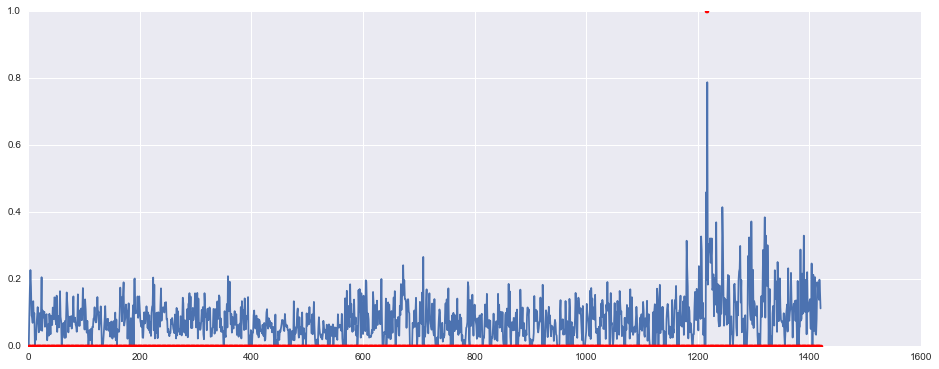

In [32]:
all_data = get_data("A1Benchmark/real_1.csv")
print(all_data.head())
data = all_data["value"].values

fig = plt.figure(figsize=(16,6))
plt.plot(all_data['timestamp'], data)
plt.plot(all_data['timestamp'], all_data['is_anomaly'],'.r')
plt.show()

s_idx = 1100
Y_train = data[:s_idx]
X_train = all_data['timestamp'].values[:s_idx]
Y_val = data[s_idx:]
X_val = all_data['timestamp'].values[s_idx:]

In [45]:
from keras.models import Sequential  
from keras.layers.core import Dense, Activation, TimeDistributedDense
from keras.layers.recurrent import LSTM

in_out_neurons = 1  
hidden_neurons = 300

model = Sequential()  
model.add(LSTM(hidden_neurons,input_dim=in_out_neurons, return_sequences=False))  
model.add(Dense(in_out_neurons))  
model.add(Activation("linear"))  
model.compile(loss="mean_squared_error", optimizer="rmsprop") 

model.fit(X_train, y_train, batch_size=450, nb_epoch=10, validation_split=0.05) 

predicted = model.predict(X_val)  
rmse = np.sqrt(((predicted - y_val) ** 2).mean(axis=0))


INFO (theano.gof.compilelock): Refreshing lock /Users/christophermartin/.theano/compiledir_Darwin-14.5.0-x86_64-i386-64bit-i386-2.7.11-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /Users/christophermartin/.theano/compiledir_Darwin-14.5.0-x86_64-i386-64bit-i386-2.7.11-64/lock_dir/lock


Train on 1045 samples, validate on 55 samples
Epoch 1/10


TypeError: ('Bad input argument to theano function with name "/Users/christophermartin/anaconda/lib/python2.7/site-packages/keras/backend/theano_backend.py:445"  at index 0(0-based)', 'Wrong number of dimensions: expected 3, got 1 with shape (450,).')

In [42]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
import numpy as np

data_dim = 1
timesteps = len(Y_train)
output_dim = 1

# expected input batch shape: (batch_size, timesteps, data_dim)
# note that we have to provide the full batch_input_shape since the network is stateful.
# the sample of index i in batch k is the follow-up for the sample i in batch k-1.
model = Sequential()
model.add(LSTM(32, return_sequences=True,
               input_shape=(timesteps, data_dim)))
model.add(LSTM(32, return_sequences=True))
model.add(TimeDistributedDense(output_dim))
model.add(Activation("linear"))  
model.compile(loss="mean_squared_error", optimizer="rmsprop") 

In [22]:
# generate dummy training data
#x_train = np.random.random((timesteps, data_dim))
#y_train = np.random.random((timesteps, data_dim))

# generate dummy validation data
#x_val = np.random.random((timesteps, data_dim))
#y_val = np.random.random((timesteps, data_dim))

In [35]:
model.fit(x_train, y_train,
          batch_size=64, nb_epoch=5, show_accuracy=True,
          validation_data=(X_val, Y_val))

Train on 1100 samples, validate on 320 samples
Epoch 1/5


TypeError: ('Bad input argument to theano function with name "/Users/christophermartin/anaconda/lib/python2.7/site-packages/keras/backend/theano_backend.py:445"  at index 0(0-based)', 'Wrong number of dimensions: expected 3, got 2 with shape (64, 1).')